# Lab 2 tutorial: Difference equations and dynamical systems

**Author**: Sarah Wesolowski [scwesolowski@salisbury.edu]

**Date**: September 9th, 2020

**Purpose**: A notebook that explores difference equations and dynamical systems and demonstrates the use of functions. Many tasks in this notebook could be shortened by using functions.

Recall from our discussions in class that for some sequence $\{a_0, a_1, \ldots, a_n, \ldots\}$, the $n$th first difference is represented by

$$ \Delta a_n = a_{n+1} - a_n $$

## Simple compound interest example

Simple compound interest is a case where difference models give exact results (up to rounding errors). Consider Example 1 from the text, where a savings certificate initially worth \$1000 accumulates interest paid each month at 1\% per month. The difference equation model is

$$ a_{n+1} = (1 + 0.01)a_n = 1.01a_n $$

where $a_0 = 1000$.

Let's set up and graph the resulting value of the savings certificate with this model. Let's start by looking at the certificate value after 10 months beyond the initial month.

In [1]:
# set up variables describing interest rate and initial value
interest_rate = 0.01 # 1% interest
starting_value = 1000 
n_months = 10

In [2]:
import numpy as np

In [3]:
# set up arrays to hold certificate value and month
cert_values = np.empty(n_months+1) # +1 because we also want the initial value in this array
months = np.arange(0,n_months+1)

The numpy [arange function](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) makes evenly spaced integer arrays

In [4]:
# check that the months are the ones you want
print(months)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [5]:
# calculate certificate value at each month
cert_values[0] = starting_value # set up initial value
for month in months:
    if month > 0: # exclude the first month because we already set it up
        cert_values[month] = (1. + interest_rate)*cert_values[month-1]
    # use print statement to check only
    print('In month', month, ', certificate value is', cert_values[month])

In month 0 , certificate value is 1000.0
In month 1 , certificate value is 1010.0
In month 2 , certificate value is 1020.1
In month 3 , certificate value is 1030.301
In month 4 , certificate value is 1040.60401
In month 5 , certificate value is 1051.0100501
In month 6 , certificate value is 1061.5201506009998
In month 7 , certificate value is 1072.1353521070098
In month 8 , certificate value is 1082.85670562808
In month 9 , certificate value is 1093.6852726843608
In month 10 , certificate value is 1104.6221254112045


Let's graph the resulting value of the certificate from month-to-month

In [6]:
import matplotlib.pyplot as plt

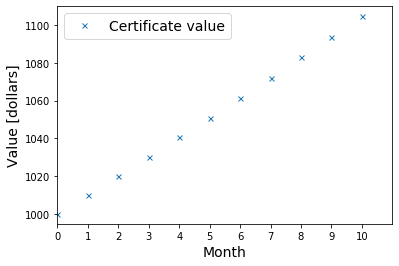

In [7]:
plt.plot(months, cert_values, 'x', label='Certificate value', markersize=5)
plt.xlim([0,n_months+1]) # force the x limits to go from 0 to the number of months + 1
plt.xticks(months) # force the ticks to appear at every month (optional, not always best choice)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value [dollars]',fontsize=14)
plt.legend(fontsize=14);

### Seeing the proportionality relationship 

Another way of graphing this system lets us directly see the proportionality relationship

$$ \Delta a_n = r a_n $$

If we calculate $\Delta a_n$ and graph it versus $a_n$, it should be a straight line with slope $r$

In [8]:
diffs_ex_1 = np.empty(n_months)

for i in range(0,n_months):
    diffs_ex_1[i] = cert_values[i+1] - cert_values[i]
    print('The', i, 'th difference is', diffs_ex_1[i])

The 0 th difference is 10.0
The 1 th difference is 10.100000000000023
The 2 th difference is 10.200999999999908
The 3 th difference is 10.303010000000086
The 4 th difference is 10.406040099999927
The 5 th difference is 10.510100500999897
The 6 th difference is 10.615201506009953
The 7 th difference is 10.721353521070114
The 8 th difference is 10.828567056280917
The 9 th difference is 10.936852726843654


Remember that these is always one less difference $\Delta a_n$ than measurements $a_n$. When we want to plot these, we have to make sure we have a matching number of data points in each array. The last piece of the $a_n$ array, `cert_values` needs to be cut off using slicing notation (see class slides)

In [9]:
cert_values_without_last = cert_values[0:n_months] # cut off the last value so the diffs can be plotted vs an

In [10]:
# check lengths of two arrays to be plotted
print(len(cert_values_without_last))
print(len(diffs_ex_1))

10
10


They're the same, so they are good to go for the plot.

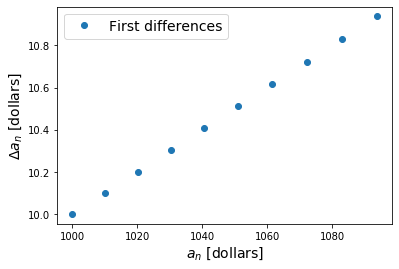

In [11]:
plt.plot(cert_values_without_last, diffs_ex_1, 'o', label='First differences');
plt.xlabel(r'$a_n$ [dollars]', fontsize=14)
plt.ylabel(r'$\Delta a_n$ [dollars]', fontsize=14)
plt.legend(fontsize=14);

## Making it easier with functions

Make sure you read Chapter 3 of Think Python :)

The graph is pretty nice, but what if we want to extend it to more months to see the trend further out? It's a little inconvenient to go back and change n_months and rerun the whole thing, although we can do that.

Let's create a function that generates a list of months and certificate values. 

Note for programming experts: Those of you with lots of C++ experience may be disturbed by how flexible Python functions are. No pointers, no call-by-value/call-by-reference (these exist still but are hidden), no worrying about only returning one thing, etc.

Just to be careful, you should make sure not to repeat names of variables already used above even though the function will take as inputs some of the same things we set up above. It's unlikely to cause a conflict because function variables are local to the function (meaning the function is the only one that knows about them), but it can be confusing.

In [12]:
def simple_compound_interest(nt, rate, a0):
    '''A function that computes simple compound interest.
    Arguments:
        nt: number of time steps to compute the interest
        rate: rate, in percent, of interest over each time step
        a0: initial value of the quantity
    Returns:
        times: array of time step values
        values: array of values of the quantity at each time step
    '''
    values = np.empty(nt+1) 
    values[0] = a0 
    times = np.arange(nt+1)
    for time in times:
        if time > 0:
            values[time] = (1.0 + rate/100.)*values[time-1]
    
    return times, values

The stuff in triple single quotes is a way of making a multi-line Python comment

`''' 
Stuff goes in comment here
'''`

Typically Python programmers describe the functions they create with these block comments. These are known as Doc strings. There is a standard for doc strings, but you should only worry about that if you are programming with Python professionally in the future. For this class, giving descriptions of the function, the variables that are passed in as arguments, and what is returned from the function.

The code inside the function is a repeat of the code above, but now we can re-use it multiple times for different cases. The rate is also input as a percent so the user can input the percent instead of converting it to a decimal. The function does it for you now. 

Let's compare some different cases, all with a starting value of \$5000.

- 30 months, interest rate of 1\%
- 30 months, interest rate of 1.5\%
- 30 months, interest rate of 0.9\%

In [13]:
months_1, values_1 = simple_compound_interest(30, 1, 5000)
months_2, values_2 = simple_compound_interest(30, 1.5, 5000)
months_3, values_3 = simple_compound_interest(30, 0.9, 5000)

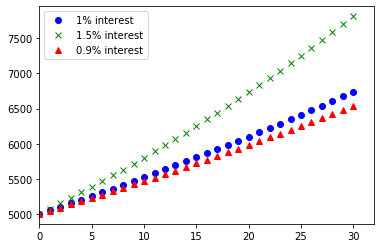

In [14]:
plt.plot(months_1, values_1, 'o', color='blue', label='1% interest');
plt.plot(months_2, values_2, 'x', color='green', label='1.5% interest');
plt.plot(months_3, values_3, '^', color='red', label='0.9% interest');

plt.xlim(0,len(months_1)+1)

plt.legend();

If you want to write functions to make your calculation easier to change for different cases, feel free to do so. If you find yourself repeating code often across different examples, you may want to put that code inside a function instead to make your notebook shorter and easier to read.

## Yeast culture examples from class

This section explores the yeast culture examples from class

In [15]:
contents = np.load('ch1-2_ex1.npz')

In [16]:
contents.files

['hours', 'biomass']

In [17]:
hours = contents['hours']
biomass = contents['biomass']

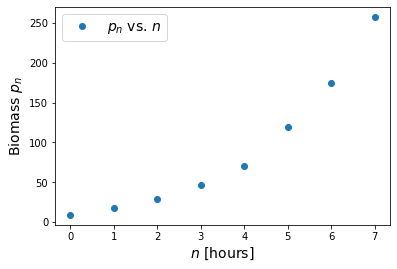

In [18]:
plt.plot(hours, biomass, 'o', label=r'$p_n$ vs. $n$');
plt.xlabel('$n$ [hours]', fontsize=14);
plt.ylabel('Biomass $p_n$', fontsize=14);
plt.legend(fontsize=14);

In [19]:
# compute change in biomass from 1 step to the next
n_hours = len(hours) # get length of the arrays to use going forward
Delta_p_n = np.empty(n_hours-1)

In [20]:
for i in range(0,n_hours-1):
    Delta_p_n[i] = biomass[i+1] - biomass[i]
    
biomass_without_last = biomass[0:n_hours-1]

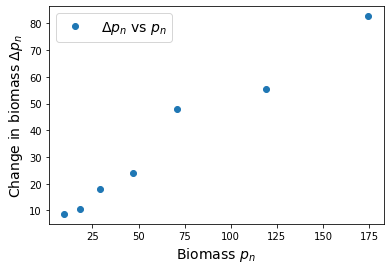

In [21]:
plt.plot(biomass_without_last, Delta_p_n, 'o', label=r'$\Delta p_n$ vs $p_n$');
plt.xlabel('Biomass $p_n$', fontsize=14);
plt.ylabel('Change in biomass $\Delta p_n$', fontsize=14);
plt.legend(fontsize=14);

Using difference equation model, compute coefficient of proportionality. Could use line of best fit, but how about just use slope between first and last point.

In [22]:
biomass_prop_coeff = (Delta_p_n[n_hours-2] - Delta_p_n[0])\
                     /(biomass_without_last[n_hours-2] - biomass_without_last[0])

In [23]:
biomass_prop_coeff

0.4484848484848486

Get a value of $k \approx 0.45$

In [24]:
Delta_p_n_preds = np.empty(n_hours-1)
for i in range(0, n_hours-1):
    Delta_p_n_preds[i] = biomass_prop_coeff * biomass_without_last[i]

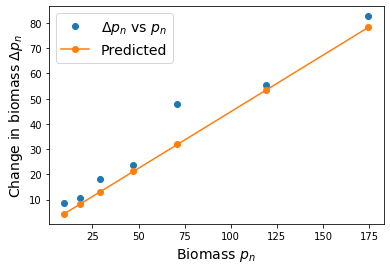

In [25]:
plt.plot(biomass_without_last, Delta_p_n, 'o', label=r'$\Delta p_n$ vs $p_n$');
plt.plot(biomass_without_last, Delta_p_n_preds, 'o-', label=r'Predicted');
plt.xlabel('Biomass $p_n$', fontsize=14);
plt.ylabel('Change in biomass $\Delta p_n$', fontsize=14);
plt.legend(fontsize=14);

### Biomass example extended (from class)

In [26]:
contents_2 = np.load('ch1-2_ex2.npz')

In [27]:
contents_2.files

['hours', 'biomass']

In [28]:
hours_2 = contents_2['hours']
biomass_2 = contents_2['biomass']

In [29]:
n_hours_2 = len(hours_2)

In [30]:
# view the data from class
for i in range(0,n_hours_2):
    print('At hour', hours_2[i], 'there is a biomass of', biomass_2[i])

At hour 0 there is a biomass of 9.6
At hour 1 there is a biomass of 18.3
At hour 2 there is a biomass of 29.0
At hour 3 there is a biomass of 47.2
At hour 4 there is a biomass of 71.1
At hour 5 there is a biomass of 119.1
At hour 6 there is a biomass of 174.6
At hour 7 there is a biomass of 257.3
At hour 8 there is a biomass of 350.7
At hour 9 there is a biomass of 441.0
At hour 10 there is a biomass of 513.3
At hour 11 there is a biomass of 559.7
At hour 12 there is a biomass of 594.8
At hour 13 there is a biomass of 629.4
At hour 14 there is a biomass of 640.8
At hour 15 there is a biomass of 651.1
At hour 16 there is a biomass of 655.9
At hour 17 there is a biomass of 659.6
At hour 18 there is a biomass of 661.8


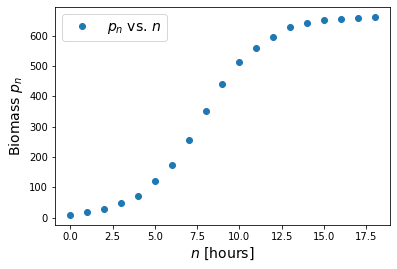

In [31]:
plt.plot(hours_2, biomass_2, 'o', label=r'$p_n$ vs. $n$');
plt.xlabel('$n$ [hours]', fontsize=14);
plt.ylabel('Biomass $p_n$', fontsize=14);
plt.legend(fontsize=14);

Carrying capacity model for yeast growth (stops somewhere)

In [32]:
carrying_capacity = 665

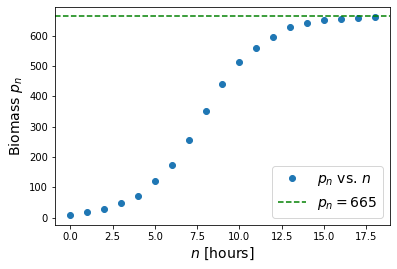

In [33]:
plt.plot(hours_2, biomass_2, 'o', label=r'$p_n$ vs. $n$');
plt.xlabel('$n$ [hours]', fontsize=14);
plt.ylabel('Biomass $p_n$', fontsize=14);
plt.axhline(carrying_capacity, color='green', linestyle='--', label='$p_n = 665$');
plt.legend(fontsize=14);

In [34]:
Delta_p_n_2 = np.empty(n_hours_2-1)
biomass_2_without_last = biomass_2[0:n_hours_2-1]

In [35]:
for i in range(0,n_hours_2-1):
    Delta_p_n_2[i] = biomass_2[i+1]-biomass_2[i]

In [36]:
print(len(biomass_2_without_last))
print(len(Delta_p_n_2))

18
18


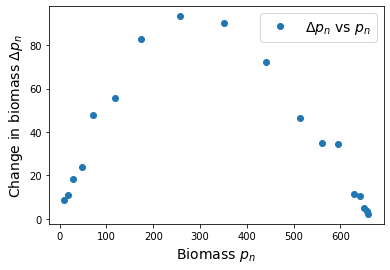

In [37]:
plt.plot(biomass_2_without_last, Delta_p_n_2, 'o', label=r'$\Delta p_n$ vs $p_n$');
plt.xlabel('Biomass $p_n$', fontsize=14);
plt.ylabel('Change in biomass $\Delta p_n$', fontsize=14);
plt.legend(fontsize=14);

Make the plot of the model variables when including the carrying capacity

$$ \Delta p_n \propto p_n(P-p_n) $$

In [38]:
Delta_p_n_model_capacity = np.empty(n_hours_2-1)
for i in range(0,n_hours_2-1):
    Delta_p_n_model_capacity[i] = (carrying_capacity - biomass_2[i])*biomass_2[i]

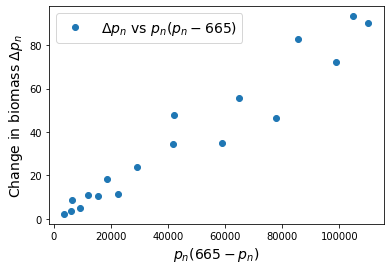

In [39]:
plt.plot(Delta_p_n_model_capacity, Delta_p_n_2, 'o', label=r'$\Delta p_n$ vs $p_n(p_n-665)$');
plt.xlabel('$p_n(665 - p_n)$', fontsize=14);
plt.ylabel('Change in biomass $\Delta p_n$', fontsize=14);
plt.legend(fontsize=14);

On page 12 book approximates slope by taking slope between origin and last point

$$ k \approx 0.00082 $$

In [40]:
slope_ex_2 = 0.00082

In [41]:
Delta_p_n_capacity_pred = np.empty(n_hours_2-1)
for i in range(0, n_hours_2-1):
    Delta_p_n_capacity_pred[i] = slope_ex_2 * Delta_p_n_model_capacity[i]

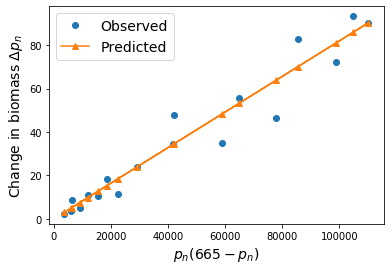

In [42]:
plt.plot(Delta_p_n_model_capacity, Delta_p_n_2, 'o', label=r'Observed');
plt.plot(Delta_p_n_model_capacity, Delta_p_n_capacity_pred, '^-', label=r'Predicted')
plt.xlabel('$p_n(665 - p_n)$', fontsize=14);
plt.ylabel('Change in biomass $\Delta p_n$', fontsize=14);
plt.legend(fontsize=14);

Now use the difference equation model to predict the biomass vs. $n$. This is the quantity that someone would actually want to see!

$$ p_{n+1} = p_n + 0.0082(665-p_n)p_n$$

In [43]:
biomass_pred_2 = np.empty(n_hours_2)

biomass_pred_2[0] = 9.6 # set up initial value

In [44]:
#iterate through each step to predict
for i in range(1,n_hours_2):
    # a forward slash can be used to carry a formula to next line
    biomass_pred_2[i] = biomass_pred_2[i-1]\
                        +slope_ex_2*(carrying_capacity - biomass_pred_2[i-1])*biomass_pred_2[i-1]

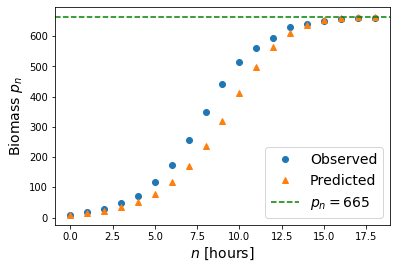

In [45]:
plt.plot(hours_2, biomass_2, 'o', label=r'Observed');
plt.plot(hours_2, biomass_pred_2, '^', label=r'Predicted');
plt.xlabel('$n$ [hours]', fontsize=14);
plt.ylabel('Biomass $p_n$', fontsize=14);
plt.axhline(carrying_capacity, color='green', linestyle='--', label='$p_n = 665$');
plt.legend(fontsize=14);

## Solutions to dynamical systems

In lecture we have studied linear dynamical systems and their properties for different starting values and coefficients.

### Linear model

The model we studied in the interest and biomass examples is

$$ a_{n+1} = s a_n $$

The solution of this system for any step $k$ is

$$ a_k = s^k a_0 $$

#### Revisiting the simple interest problem

Before, we had a simple interest problem with $a_0 = 1000$ and an interest rate of $r=0.01$. The dynamical systems model was therefore

$$ a_{n+1} = 1.01 a_n $$

We identify the coefficient 1.01 as the $s$ for the above system. (Note that we used $r$ for interest rate earlier, here $s = 1+r$.

Let's plot the results again except now using the solution of the model instead of iterating through each step one-by-one with the dynamical system.

In [46]:
n_months_new = 120
s_val = 1.01
months_new = np.arange(0,n_months_new+1) 

In [47]:
months_new

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120])

In [48]:
cert_values_new = np.empty(n_months_new+1)
cert_values_new[0] = starting_value # starting value from before
for k in range(0, n_months_new):
    if k > 0: 
        cert_values_new[k] = np.power(s_val, k) * cert_values_new[0]

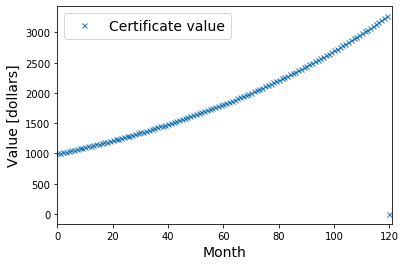

In [49]:
plt.plot(months_new, cert_values_new, 'x', label='Certificate value', markersize=5)
plt.xlim([0,n_months_new+1]) # force the x limits to go from 0 to the number of months + 1
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value [dollars]',fontsize=14)
plt.legend(fontsize=14);

### Sewage disposal example

Each hour 12% of the remaining contaminants are removed from the contents of the processing tank

- What percentage of sewage remains after 1 day?
- How long to lower amount of sewage by half?
- How long until we are down to 10% of original level?

$$ a_{n+1} = a_n - 0.12 a_n = 0.88 a_n $$

so $s = 0.88 $

In class we did this analytically. Let's do it numerically here for a specific example. We have to assume a starting value to do it numerically. Let's say the starting amount is $a_0 = 100$ tons.

In [50]:
starting_sewage = 100
n_hours_sewage = 24 # can change if it's not enough/ too much
s_sewage = 0.88

In [51]:
hours_sewage = np.arange(0,n_hours_sewage+1)
amount_sewage = np.empty(n_hours_sewage+1)
amount_sewage[0] = starting_sewage

In [52]:
for k in range(0, n_hours_sewage+1):
    if k > 0:
        amount_sewage[k] = np.power(s_sewage, k) * amount_sewage[0]

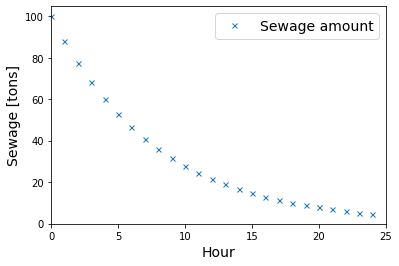

In [53]:
plt.plot(hours_sewage, amount_sewage, 'x', label='Sewage amount', markersize=5)
plt.xlim([0,n_hours_sewage+1]) # force the x limits to go from 0 to the number of months + 1
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Sewage [tons]',fontsize=14)
plt.legend(fontsize=14);

To answer the question from before: plot horizontal lines to see when amount goes below a certain value

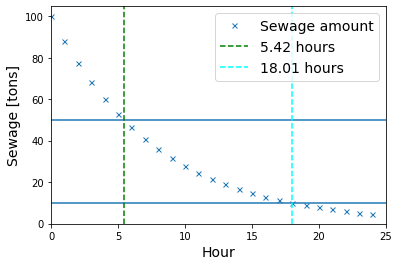

In [54]:
plt.plot(hours_sewage, amount_sewage, 'x', label='Sewage amount', markersize=5)
plt.axhline(starting_sewage * 0.10);
plt.axhline(starting_sewage * 0.50);

plt.axvline(5.42, linestyle='--', color='green', label=r'5.42 hours')
plt.axvline(18.01, linestyle='--', color='cyan', label=r'18.01 hours')

plt.xlim([0,n_hours_sewage+1]) # force the x limits to go from 0 to the number of months + 1
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Sewage [tons]',fontsize=14)
plt.legend(fontsize=14);

### Different possibilities for simple linear model

In [55]:
s_1 = 1.1
s_2 = 1
s_3 = 0.8
s_4 = -0.8
s_5 = -1
s_6 = -1.1

a_0_val_s = 1

n_pds_s = 25
pds_1 = np.arange(0, n_pds_s+1)
a_vals_1 = np.empty(n_pds_s+1)
a_vals_1[0] = a_0_val_s

pds_2 = np.arange(0, n_pds_s+1)
a_vals_2 = np.empty(n_pds_s+1)
a_vals_2[0] = a_0_val_s

pds_3 = np.arange(0, n_pds_s+1)
a_vals_3 = np.empty(n_pds_s+1)
a_vals_3[0] = a_0_val_s

pds_4 = np.arange(0, n_pds_s+1)
a_vals_4 = np.empty(n_pds_s+1)
a_vals_4[0] = a_0_val_s

pds_5 = np.arange(0, n_pds_s+1)
a_vals_5 = np.empty(n_pds_s+1)
a_vals_5[0] = a_0_val_s

pds_6 = np.arange(0, n_pds_s+1)
a_vals_6 = np.empty(n_pds_s+1)
a_vals_6[0] = a_0_val_s

In [56]:
for k in range(0, n_pds_s+1):
    if k > 0:
        a_vals_1[k] = np.power(s_1, k) * a_vals_1[0]
        a_vals_2[k] = np.power(s_2, k) * a_vals_2[0]        
        a_vals_3[k] = np.power(s_3, k) * a_vals_3[0]        
        a_vals_4[k] = np.power(s_4, k) * a_vals_4[0]        
        a_vals_5[k] = np.power(s_5, k) * a_vals_5[0]        
        a_vals_6[k] = np.power(s_6, k) * a_vals_6[0]        

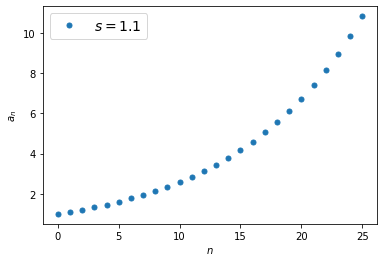

In [57]:
plt.plot(pds_1, a_vals_1, 'o', markersize=5, label=r'$s = 1.1$');
plt.xlabel(r'$n$');
plt.ylabel(r'$a_n$');
plt.legend(fontsize=14);

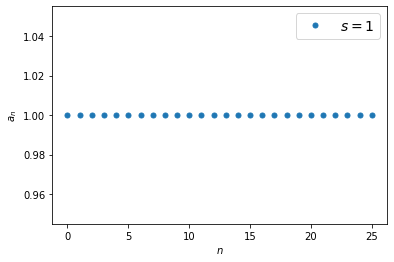

In [58]:
plt.plot(pds_2, a_vals_2, 'o', markersize=5, label=r'$s = 1$');
plt.xlabel(r'$n$');
plt.ylabel(r'$a_n$');
plt.legend(fontsize=14);

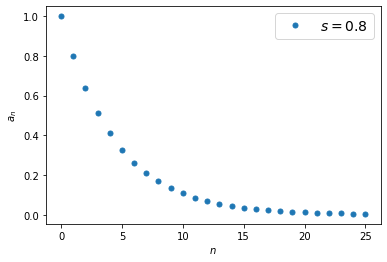

In [59]:
plt.plot(pds_3, a_vals_3, 'o', markersize=5, label=r'$s = 0.8$');
plt.xlabel(r'$n$');
plt.ylabel(r'$a_n$');
plt.legend(fontsize=14);

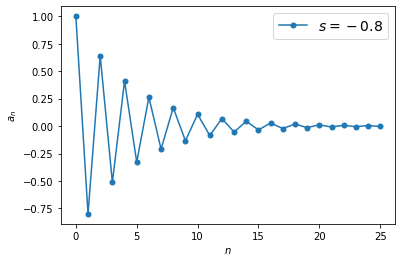

In [60]:
plt.plot(pds_4, a_vals_4, 'o-', markersize=5, label=r'$s = -0.8$');
plt.xlabel(r'$n$');
plt.ylabel(r'$a_n$');
plt.legend(fontsize=14);

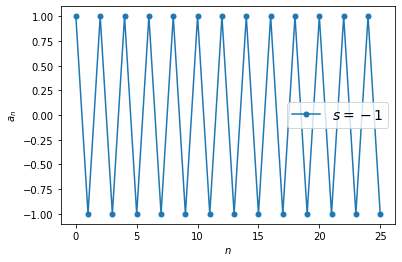

In [61]:
plt.plot(pds_5, a_vals_5, 'o-', markersize=5, label=r'$s = -1$');
plt.xlabel(r'$n$');
plt.ylabel(r'$a_n$');
plt.legend(fontsize=14);

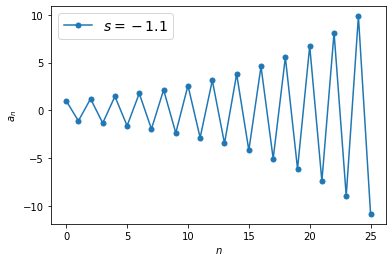

In [62]:
plt.plot(pds_6, a_vals_6, 'o-', markersize=5, label=r'$s = -1.1$');
plt.xlabel(r'$n$');
plt.ylabel(r'$a_n$');
plt.legend(fontsize=14);

### Linear model with constant

For models where some amount is added at each step, such as in the interest problems where you deposit money or make a payment each month in addition to the interest earnings, we have the system

$$ a_{n+1} = r a_n + b $$

The solution to this system for any step $k$ is

$$ a_k = r^k c + \frac{b}{1-r} $$

where $c$ is a constant related to the initial condition (related to **but not equal to** the value of $a_0$)

### Digoxin equilibrium example

The system from the in-class example was

$$ a_{n+1} = 0.5 a_n + 0.1 $$

So $r=0.5$ and $b = 0.1$ is the daily dose.

Let's compute the blood concentration for digoxin for the three different starting values

- A: $a_0 = 0.1$
- B: $a_0 = 0.2$
- C: $a_0 = 0.3$

In [63]:
n_doses = 15
dosage_periods = np.arange(0,n_doses+1)

r_val_digoxin = 0.5
daily_dose = 0.1

# set up arrays for concentrations
concentration_1 = np.empty(n_doses+1)
concentration_2 = np.empty(n_doses+1)
concentration_3 = np.empty(n_doses+1)

# set up initial values
concentration_1[0] = 0.1
concentration_2[0] = 0.2
concentration_3[0] = 0.3

In [64]:
# compute concentration for each day using the dynamical system
for i in range(0,n_doses+1):
    if i>0:
        concentration_1[i] = r_val_digoxin * concentration_1[i-1]\
                             + daily_dose
        concentration_2[i] = r_val_digoxin * concentration_2[i-1]\
                             + daily_dose
        concentration_3[i] = r_val_digoxin * concentration_3[i-1]\
                             + daily_dose

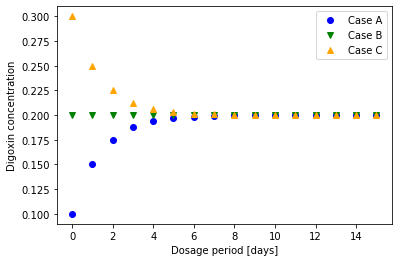

In [65]:
plt.plot(dosage_periods, concentration_1, 'o', color='blue', label='Case A');
plt.plot(dosage_periods, concentration_2, 'v', color='green', label='Case B');
plt.plot(dosage_periods, concentration_3, '^', color='orange', label='Case C');

plt.xlabel('Dosage period [days]')
plt.ylabel('Digoxin concentration')

plt.legend();

## Systems of difference equations



### Car rental example

$$ O_{n+1} = 0.6 O_n + 0.3 T_n $$
$$ T_{n+1} = 0.4 O_n + 0.7 T_n $$

Four starting values:
- Case 1: $O_0 = 7000$, $T_0 = 0$
- Case 2: $O_0 = 5000$, $T_0 = 2000$
- Case 3: $O_0 = 2000$, $T_0 = 5000$
- Case 4: $O_0 = 0$, $T_0 = 7000$

In [66]:
# set up constants
coeff_1_Orlando = 0.6
coeff_2_Orlando = 0.3
coeff_1_Tampa = 0.4
coeff_2_Tampa = 0.7
n_days = 8

# set up arrays
days = np.arange(0,n_days+1)

orlando_case_1 = np.empty(n_days+1)
tampa_case_1 = np.empty(n_days+1)
orlando_case_1[0] = 7000
tampa_case_1[0] = 0

orlando_case_2 = np.empty(n_days+1)
tampa_case_2 = np.empty(n_days+1)
orlando_case_2[0] = 5000
tampa_case_2[0] = 2000

orlando_case_3 = np.empty(n_days+1)
tampa_case_3 = np.empty(n_days+1)
orlando_case_3[0] = 2000
tampa_case_3[0] = 5000

orlando_case_4 = np.empty(n_days+1)
tampa_case_4 = np.empty(n_days+1)
orlando_case_4[0] = 0
tampa_case_4[0] = 7000

In [67]:
for i in range(0, n_days+1):
    if i > 0:
        orlando_case_1[i] = coeff_1_Orlando * orlando_case_1[i-1]\
                           +coeff_2_Orlando * tampa_case_1[i-1]
        tampa_case_1[i] = coeff_1_Tampa * orlando_case_1[i-1]\
                           +coeff_2_Tampa * tampa_case_1[i-1]
        
        orlando_case_2[i] = coeff_1_Orlando * orlando_case_2[i-1]\
                           +coeff_2_Orlando * tampa_case_2[i-1]
        tampa_case_2[i] = coeff_1_Tampa * orlando_case_2[i-1]\
                           +coeff_2_Tampa * tampa_case_2[i-1]
        
        orlando_case_3[i] = coeff_1_Orlando * orlando_case_3[i-1]\
                           +coeff_2_Orlando * tampa_case_3[i-1]
        tampa_case_3[i] = coeff_1_Tampa * orlando_case_3[i-1]\
                           +coeff_2_Tampa * tampa_case_3[i-1]
        
        orlando_case_4[i] = coeff_1_Orlando * orlando_case_4[i-1]\
                           +coeff_2_Orlando * tampa_case_4[i-1]
        tampa_case_4[i] = coeff_1_Tampa * orlando_case_4[i-1]\
                           +coeff_2_Tampa * tampa_case_4[i-1]

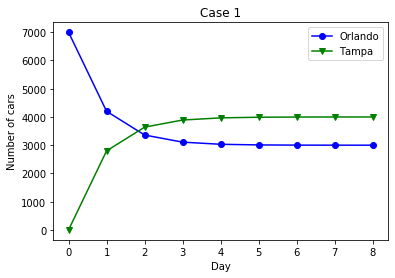

In [68]:
plt.plot(days, orlando_case_1, '-o', color='blue', label='Orlando');
plt.plot(days, tampa_case_1, '-v', color='green', label='Tampa');


plt.xlabel('Day');
plt.ylabel('Number of cars');
plt.title('Case 1');

plt.legend();

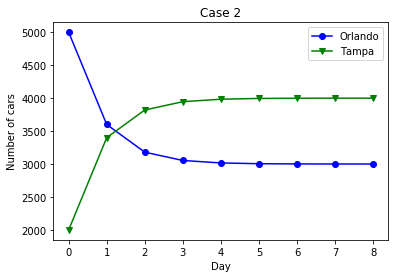

In [69]:
plt.plot(days, orlando_case_2, '-o', color='blue', label='Orlando');
plt.plot(days, tampa_case_2, '-v', color='green', label='Tampa');


plt.xlabel('Day')
plt.ylabel('Number of cars')
plt.title('Case 2')

plt.legend();

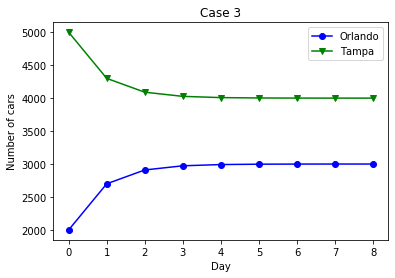

In [70]:
plt.plot(days, orlando_case_3, '-o', color='blue', label='Orlando');
plt.plot(days, tampa_case_3, '-v', color='green', label='Tampa');


plt.xlabel('Day')
plt.ylabel('Number of cars')
plt.title('Case 3')

plt.legend();

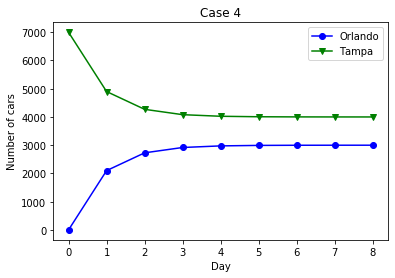

In [71]:
plt.plot(days, orlando_case_4, '-o', color='blue', label='Orlando');
plt.plot(days, tampa_case_4, '-v', color='green', label='Tampa');


plt.xlabel('Day')
plt.ylabel('Number of cars')
plt.title('Case 4')

plt.legend();